<a href="https://colab.research.google.com/github/HammedAiye/Computational_Drug_Design/blob/main/amyloid_beta_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
!chmod +x Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
!bash ./Miniconda3-py312_24.3.0-0-Linux-x86_64.sh -b -f -p /usr/local
!conda install -c conda-forge rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.12/site-packages/')

--2024-06-08 08:29:47--  https://repo.anaconda.com/miniconda/Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143351488 (137M) [application/octet-stream]
Saving to: ‘Miniconda3-py312_24.3.0-0-Linux-x86_64.sh.1’

Miniconda3-py312_24 100%[===================>] 136.71M   204MB/s    in 0.7s    

2024-06-08 08:29:48 (204 MB/s) - ‘Miniconda3-py312_24.3.0-0-Linux-x86_64.sh.1’ saved [143351488/143351488]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, ple

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('amyloid_beta_03_bioactivity_data_curated.csv')

In [5]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [6]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [7]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL311039,5000.0,intermediate,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1
1,CHEMBL450926,2700.0,intermediate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1
2,CHEMBL310242,1800.0,intermediate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
3,CHEMBL74874,11000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
4,CHEMBL75183,10000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
...,...,...,...,...
1183,CHEMBL5274298,1030.0,intermediate,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...
1184,CHEMBL5283067,990.0,active,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...
1185,CHEMBL5273520,100.0,active,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...
1186,CHEMBL5282081,1560.0,intermediate,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...


In [8]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [9]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [10]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.31880,1.0,2.0
1,299.461,3.24120,1.0,3.0
2,311.422,3.31880,1.0,2.0
3,327.877,3.83310,1.0,2.0
4,372.328,3.94220,1.0,2.0
...,...,...,...,...
1183,510.448,-0.85390,7.0,13.0
1184,680.640,4.43222,6.0,15.0
1185,624.620,5.52076,7.0,13.0
1186,552.491,4.81824,4.0,10.0


In [11]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.31880,1.0,2.0
1,299.461,3.24120,1.0,3.0
2,311.422,3.31880,1.0,2.0
3,327.877,3.83310,1.0,2.0
4,372.328,3.94220,1.0,2.0
...,...,...,...,...
1183,510.448,-0.85390,7.0,13.0
1184,680.640,4.43222,6.0,15.0
1185,624.620,5.52076,7.0,13.0
1186,552.491,4.81824,4.0,10.0


In [12]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [13]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate,311.422,3.31880,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate,299.461,3.24120,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate,311.422,3.31880,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.83310,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.94220,1.0,2.0
...,...,...,...,...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,1030.0,intermediate,510.448,-0.85390,7.0,13.0
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,990.0,active,680.640,4.43222,6.0,15.0
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,100.0,active,624.620,5.52076,7.0,13.0
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,1560.0,intermediate,552.491,4.81824,4.0,10.0


In [14]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [15]:
df_combined.standard_value.describe()

count    1.188000e+03
mean     2.334128e+04
std      8.556325e+04
min     -1.000000e+00
25%      1.790000e+02
50%      3.865000e+03
75%      1.711750e+04
max      1.655000e+06
Name: standard_value, dtype: float64

In [16]:
-np.log10( (10**-9)* 100000000 )

1.0

In [17]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [18]:
def norm_value(input):
    norm = input['standard_value'] / input['standard_value'].max()

    input['standard_value_norm'] = norm
    x = input.drop(['standard_value'], axis=1)  # Provide column names as a list and specify the axis

    return x

In [19]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,0.003021
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,0.001631
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,0.001088
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,0.006647
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,0.006042
...,...,...,...,...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,intermediate,510.448,-0.85390,7.0,13.0,0.000622
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,active,680.640,4.43222,6.0,15.0,0.000598
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,active,624.620,5.52076,7.0,13.0,0.000060
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,intermediate,552.491,4.81824,4.0,10.0,0.000943


In [20]:
df_norm.standard_value_norm.describe()

count    1.188000e+03
mean     1.410349e-02
std      5.169985e-02
min     -6.042296e-07
25%      1.081571e-04
50%      2.335347e-03
75%      1.034290e-02
max      1.000000e+00
Name: standard_value_norm, dtype: float64

In [21]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)  # Updated this line

    return x

# Now call the function
df_final = pIC50(df_norm)
df_final

<ipython-input-21-769d16bfb553>:6: RuntimeWarning: invalid value encountered in log10
  pIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,11.519828
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,11.787434
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,11.963525
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,11.177405
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,11.218798
...,...,...,...,...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,intermediate,510.448,-0.85390,7.0,13.0,12.205961
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,active,680.640,4.43222,6.0,15.0,12.223163
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,active,624.620,5.52076,7.0,13.0,13.218798
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,intermediate,552.491,4.81824,4.0,10.0,12.025673


In [22]:
df_final = pIC50(df_norm)
df_final

<ipython-input-21-769d16bfb553>:6: RuntimeWarning: invalid value encountered in log10
  pIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,11.519828
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,11.787434
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,11.963525
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,11.177405
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,11.218798
...,...,...,...,...,...,...,...,...
1183,CHEMBL5274298,COC(=O)c1cc(O)cc(OC)c1C(=O)c1c(O)cc(CO[C@H]2O[...,intermediate,510.448,-0.85390,7.0,13.0,12.205961
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,active,680.640,4.43222,6.0,15.0,12.223163
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,active,624.620,5.52076,7.0,13.0,13.218798
1186,CHEMBL5282081,COC(=O)c1c(O)cc(C)cc1C(=O)c1cc(O)cc2oc3cc4c(c(...,intermediate,552.491,4.81824,4.0,10.0,12.025673


In [23]:
df_final.pIC50.describe()

count    1187.000000
mean       11.983494
std         1.336165
min         9.000000
25%        10.984411
50%        11.631087
75%        12.963525
max        15.741677
Name: pIC50, dtype: float64

In [24]:
df_final.to_csv('amyloid_beta_04_bioactivity_data_3class_pIC50.csv')

In [25]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,11.177405
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,11.218798
5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.68080,1.0,1.0,9.734498
6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,10.343737
7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,10.332307
...,...,...,...,...,...,...,...,...
1178,CHEMBL5290033,Cc1ccc(NCC[C@@H]2CCCN3CCCC[C@H]23)c2c(=O)c3ccc...,inactive,390.527,5.32112,1.0,4.0,11.104855
1179,CHEMBL5283881,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)C[C@@H](O)[C...,active,671.879,5.56660,4.0,6.0,13.537557
1184,CHEMBL5283067,COC(=O)c1c(Sc2c(O)cc(OC)c(C(=O)c3c(O)cc(C)cc3O...,active,680.640,4.43222,6.0,15.0,12.223163
1185,CHEMBL5273520,COC(=O)c1c(O)cc(C)c(Sc2c(O)cc(OC)c(Oc3c(O)cc(C...,active,624.620,5.52076,7.0,13.0,13.218798


In [26]:
df_2class.to_csv('amyloid_beta_05_bioactivity_data_2class_pIC50.csv')

In [27]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

<ipython-input-28-8637ccf0d54f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_2class, edgecolor='black', palette=['blue', 'brown'])


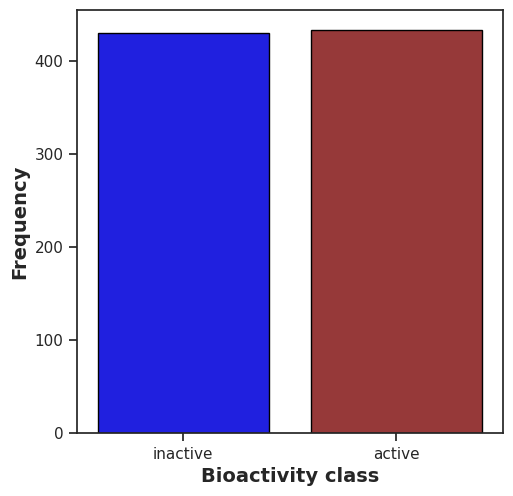

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black', palette=['blue', 'brown'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

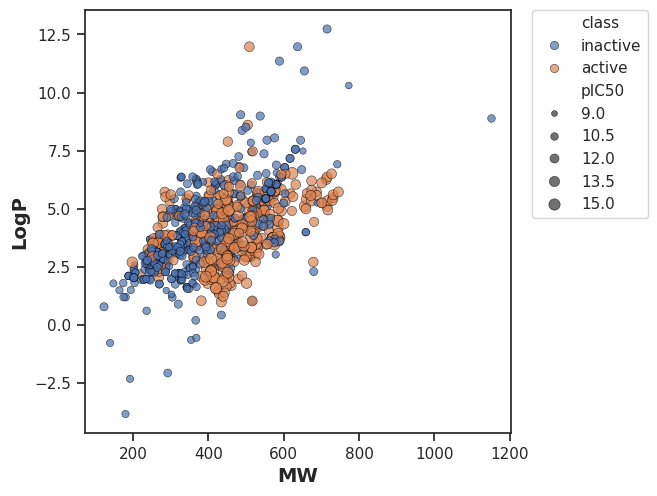

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

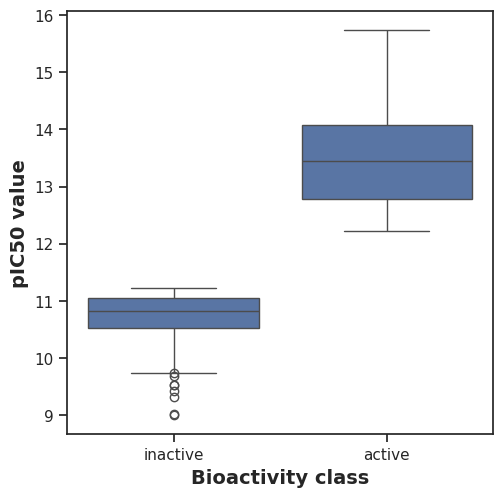

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [31]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [32]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


<ipython-input-33-74da55544c35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='MW', data=df_2class, palette=['blue', 'brown'])


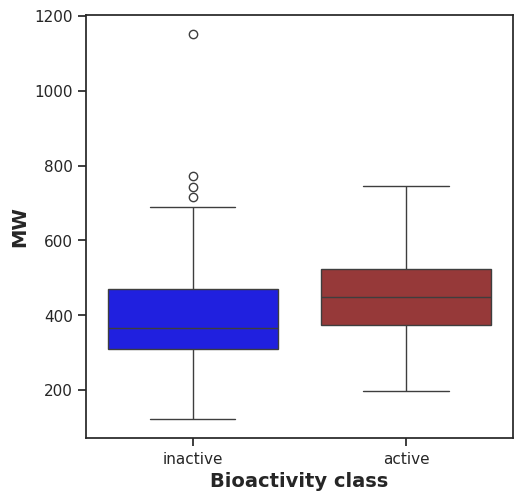

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='class', y='MW', data=df_2class, palette=['blue', 'brown'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [34]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,119998.0,2.017137e-13,0.05,Different distribution (reject H0)


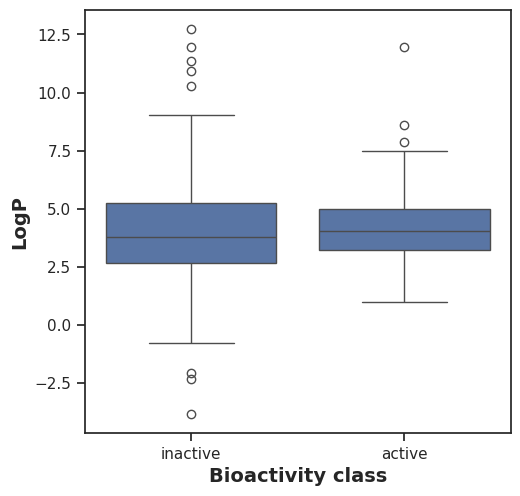

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [36]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,98977.5,0.108164,0.05,Same distribution (fail to reject H0)


<ipython-input-37-3fd6966cbe53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette=['blue', 'brown'])


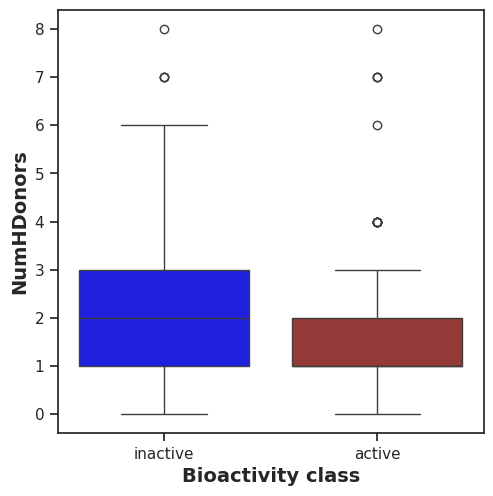

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette=['blue', 'brown'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [38]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,75564.0,7.287576e-07,0.05,Different distribution (reject H0)


<ipython-input-39-e1ef3d7cb3de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette=['blue', 'brown'])


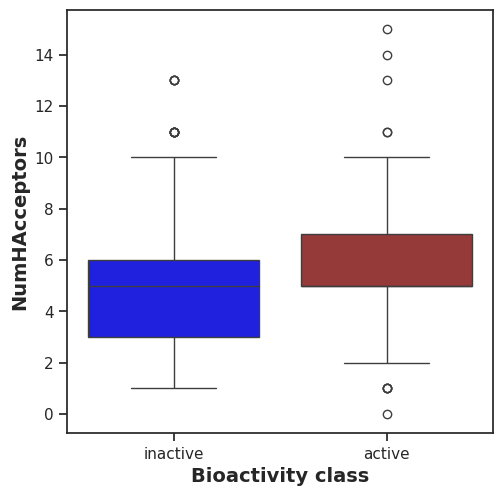

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette=['blue', 'brown'])

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [40]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,118578.0,1.645117e-12,0.05,Different distribution (reject H0)


In [41]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 4%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_LogP.pdf (deflated 40%)
  adding: amyloid_beta_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: amyloid_beta_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: amyloid_beta_03_bioactivity_data_curated.csv (deflated 82%)
